In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "C:\\Users\\urjit\\Downloads\\traffic-signs-data\\train.p"
validation_file="C:\\Users\\urjit\\Downloads\\traffic-signs-data\\valid.p"
testing_file = "C:\\Users\\urjit\\Downloads\\traffic-signs-data\\test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print(len(X_train))
#print(test)

34799


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
import time
print("hi")
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]


# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

hi
Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


[( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
 ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
 ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
 ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
 ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
 (10, b'No passing for vehicles over 3.5 metric tons')
 (11, b'Right-of-way at the next intersection') (12, b'Priority road')
 (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
 (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
 (18, b'General caution') (19, b'Dangerous curve to the left')
 (20, b'Dangerous curve to the right') (21, b'Double curve')
 (22, b'Bumpy road') (23, b'Slippery road')
 (24, b'Road narrows on the right') (25, b'Road work')
 (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
 (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
 (31, b'Wild animals crossing')
 (32, b'End of all speed and passing limits') (33, b'Turn right a

TypeError: Invalid shape (32, 32, 1) for image data

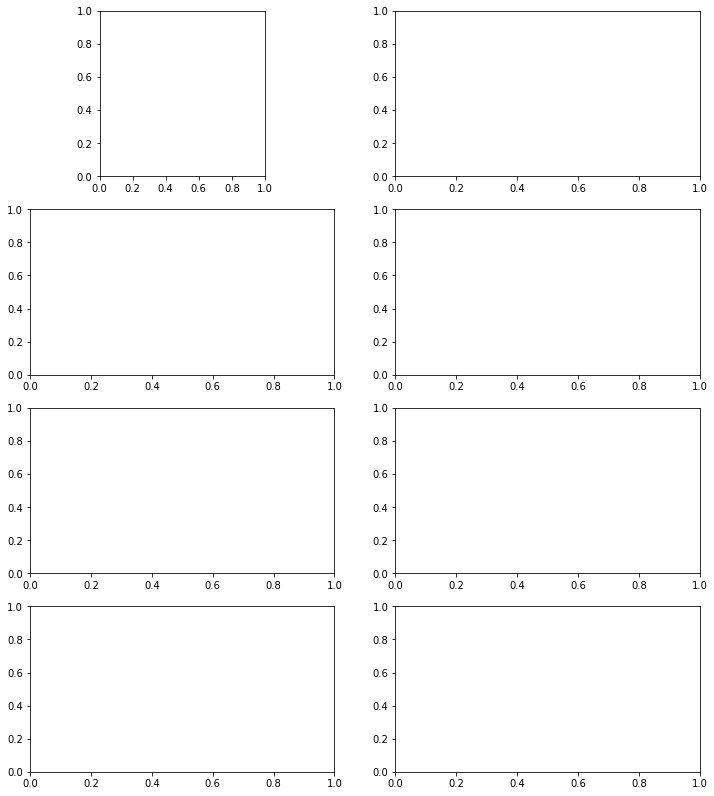

In [39]:
import random
def plot_figures(figures, nrows = 1, ncols=1, labels=None):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12, 14))
    axs = axs.ravel()
    for index, title in zip(range(len(figures)), figures):
        axs[index].imshow(figures[title], plt.gray())
        if(labels != None):
           axs[index].set_title(labels[index])
        else:
            axs[index].set_title(title)
            
        axs[index].set_axis_off()
        
    plt.tight_layout()
    
name_values = np.genfromtxt('C:\\Users\\urjit\\Desktop\\sign_names.csv', skip_header=1, dtype=[('myint','i8'), ('mysring','S55')], delimiter=',')
print(name_values)
number_to_stop = 8
figures = {}
labels = {}
for i in range(number_to_stop):
    index = random.randint(0, n_train-1)
    labels[i] = name_values[y_train[index]][1].decode('ascii')
#     print(name_values[y_train[index]][1].decode('ascii'))
    figures[i] = X_train[index]
print(labels)    
plot_figures(figures, 4, 2, labels)

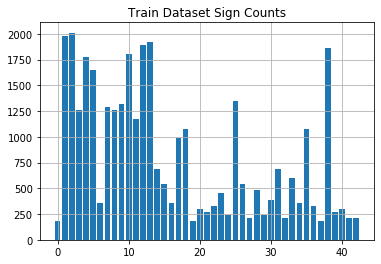

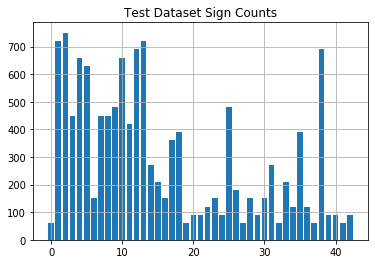

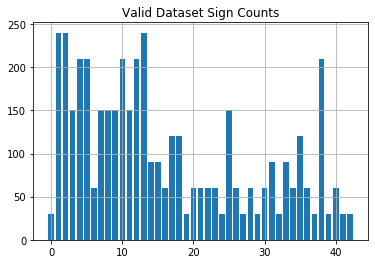

In [40]:
unique_train, counts_train = np.unique(y_train, return_counts=True)

plt.bar(unique_train, counts_train)
plt.grid()
plt.title("Train Dataset Sign Counts")
plt.show()

unique_test, counts_test = np.unique(y_test, return_counts=True)
plt.bar(unique_test, counts_test)
plt.grid()
plt.title("Test Dataset Sign Counts")
plt.show()

unique_valid, counts_valid = np.unique(y_valid, return_counts=True)
plt.bar(unique_valid, counts_valid)
plt.grid()
plt.title("Valid Dataset Sign Counts")
plt.show()


In [9]:

# Convert to grayscale
X_train_rgb = X_train
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)

X_test_rgb = X_test
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

X_valid_rgb = X_valid
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)

print(X_train_rgb.shape)
print(X_train_gray.shape)

print(X_test_rgb.shape)
print(X_test_gray.shape)

(34799, 32, 32, 3)
(34799, 32, 32, 1)
(12630, 32, 32, 3)
(12630, 32, 32, 1)


In [10]:
X_train = X_train_gray
X_test = X_test_gray
X_valid = X_valid_gray

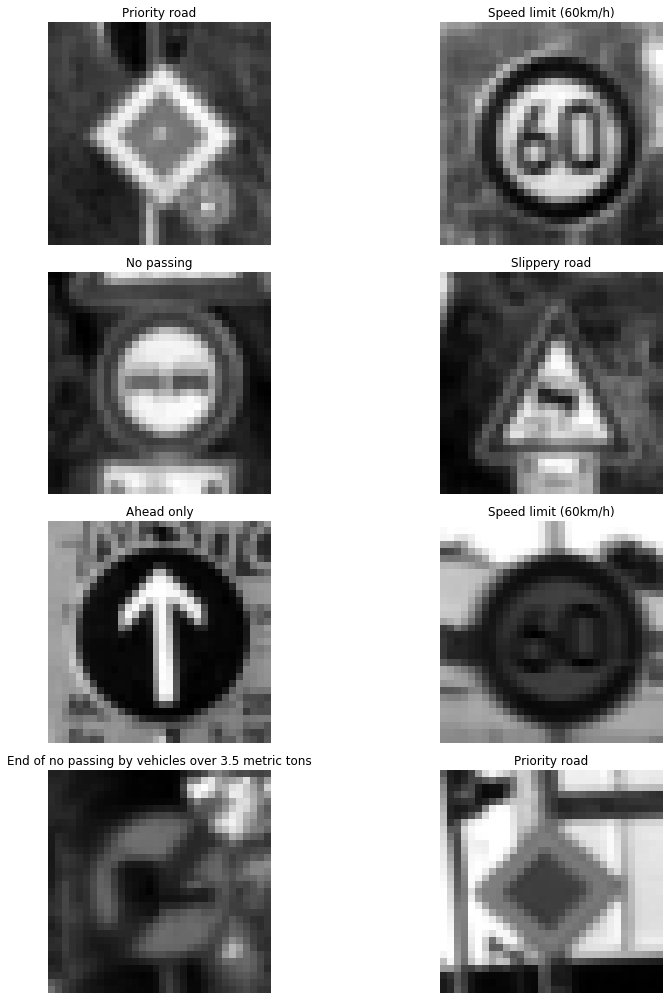

In [41]:
image_depth_channels = X_train.shape[3]

# print(image_depth_channels)

number_to_stop = 8
figures = {}
random_signs = []
for i in range(number_to_stop):
    index = random.randint(0, n_train-1)
    labels[i] = name_values[y_train[index]][1].decode('ascii')
    figures[i] = X_train[index].squeeze()
    random_signs.append(index)
    
# print(random_signs)
plot_figures(figures, 4, 2, labels)

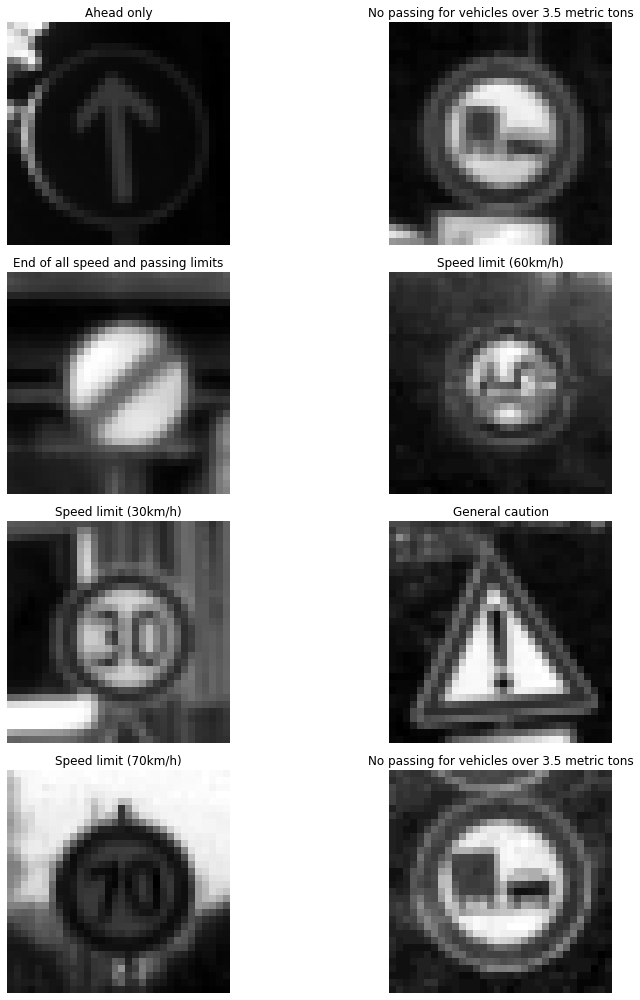

In [12]:
def normalize(im):
    return -np.log(1/((1 + im)/257) - 1)

# X_train_normalized = normalize(X_train)
# X_test_normalized = normalize(X_test)
X_train_normalized = X_train/127.5-1
X_test_normalized = X_test/127.5-1

number_to_stop = 8
figures = {}
count = 0
for i in random_signs:
    labels[count] = name_values[y_train[i]][1].decode('ascii')
    figures[count] = X_train_normalized[i].squeeze()
    count += 1;
    
plot_figures(figures, 4, 2, labels)

In [13]:
X_train = X_train_normalized
X_test = X_test_normalized

In [35]:
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    print(x.shape)
    return tf.nn.relu(x)

def LeNet(x):
    mu = 0
    sigma = 0.1
    
    W_one = tf.Variable(tf.truncated_normal(shape=(5, 5, image_depth_channels, 6), mean = mu, stddev = sigma))
    b_one = tf.Variable(tf.zeros(6))
    layer_one = conv2d(x, W_one, b_one, 1)
    
    layer_one = tf.nn.max_pool(layer_one, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print(layer_one.shape)
    print()
    
    W_two = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    b_two = tf.Variable(tf.zeros(16))
    layer_two = conv2d(layer_one, W_two, b_two, 1)
    
    layer_two = tf.nn.max_pool(layer_two, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print(layer_two.shape)
    print()
    
    W_two_a = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 412), mean = mu, stddev = sigma))
    b_two_a = tf.Variable(tf.zeros(412))
    layer_two_a = conv2d(layer_two, W_two_a, b_two_a, 1)
    
    #layer_two_a = tf.nn.max_pool(layer_two_a, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')
    print(layer_two_a.shape)
    print()    
    
    #flat = tf.nn.flatten(layer_two_a)
    flat=tf.keras.layers.Flatten()(layer_two_a) 
    
    W_three = tf.Variable(tf.truncated_normal(shape=(412, 122), mean = mu, stddev = sigma))
    b_three = tf.Variable(tf.zeros(122))
    layer_three = tf.nn.relu(tf.nn.bias_add(tf.matmul(flat, W_three), b_three))
    layer_three = tf.nn.dropout(layer_three, keep_prob)
    
    W_four = tf.Variable(tf.truncated_normal(shape=(122, 84), mean = mu, stddev = sigma))
    b_four = tf.Variable(tf.zeros(84))
    layer_four = tf.nn.relu(tf.nn.bias_add(tf.matmul(layer_three, W_four), b_four))
    layer_four = tf.nn.dropout(layer_four, keep_prob)
    
    W_five = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    b_five = tf.Variable(tf.zeros(43))
    layer_five = tf.nn.bias_add(tf.matmul(layer_four, W_five), b_five)
    
    return layer_five

x = tf.placeholder(tf.float32, (None, 32, 32, image_depth_channels))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

keep_prob = tf.placeholder(tf.float32)

    #
'''If a well known architecture was chosen:
* What architecture was chosen?
* Why did you believe it would be relevant to the traffic sign application?
* How does the final model's accuracy on the training, validation and test set provide evidence that the model is working well?
    '''

"If a well known architecture was chosen:\n* What architecture was chosen?\n* Why did you believe it would be relevant to the traffic sign application?\n* How does the final model's accuracy on the training, validation and test set provide evidence that the model is working well?\n    "

In [36]:
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
EPOCHS = 27
BATCH_SIZE = 156

rate = 0.00097

logits = LeNet(x)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

(?, 28, 28, 6)
(?, 14, 14, 6)

(?, 10, 10, 16)
(?, 5, 5, 16)

(?, 1, 1, 412)
(?, 1, 1, 412)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [38]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    validation_accuracy_figure = []
    test_accuracy_figure = []
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_accuracy_figure.append(validation_accuracy)
        
        test_accuracy = evaluate(X_train, y_train)
        test_accuracy_figure.append(test_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")


Training...

EPOCH 1 ...
Test Accuracy = 0.584
Validation Accuracy = 0.455

EPOCH 2 ...
Test Accuracy = 0.841
Validation Accuracy = 0.693

EPOCH 3 ...
Test Accuracy = 0.910
Validation Accuracy = 0.749

EPOCH 4 ...
Test Accuracy = 0.940
Validation Accuracy = 0.805

EPOCH 5 ...
Test Accuracy = 0.956
Validation Accuracy = 0.821

EPOCH 6 ...
Test Accuracy = 0.974
Validation Accuracy = 0.849

EPOCH 7 ...
Test Accuracy = 0.982
Validation Accuracy = 0.848

EPOCH 8 ...
Test Accuracy = 0.985
Validation Accuracy = 0.870

EPOCH 9 ...
Test Accuracy = 0.989
Validation Accuracy = 0.893

EPOCH 10 ...
Test Accuracy = 0.990
Validation Accuracy = 0.897

EPOCH 11 ...
Test Accuracy = 0.993
Validation Accuracy = 0.888

EPOCH 12 ...
Test Accuracy = 0.993
Validation Accuracy = 0.904

EPOCH 13 ...
Test Accuracy = 0.994
Validation Accuracy = 0.887

EPOCH 14 ...
Test Accuracy = 0.994
Validation Accuracy = 0.894

EPOCH 15 ...
Test Accuracy = 0.996
Validation Accuracy = 0.888

EPOCH 16 ...
Test Accuracy = 0.997
V